In [121]:
from tqdm import tqdm
import os 
from pandas import DataFrame
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split



In [122]:
def get_themes(df):
        # creating themes for programmes
    df.loc[(df.Name.str.contains(pat = 'TELEDYSKI')) | (df.Name.str.contains(pat = 'MUSICAL')) | (df.Name.str.contains(pat = 'KONCERT')) | (df.Name.str.contains(pat = 'MUZ.')) | (df.Name.str.contains(pat = 'PUNK')) | (df.Name.str.contains(pat = 'HITS')) | (df.Name.str.contains(pat = 'MTV')),'Title']='Muzyka' 
    df.loc[(df.Name.str.contains(pat = 'DOK.')| df.Name.str.contains(pat = 'REP.'),'Title')]='Dokument' 
    df.loc[(df.Name.str.contains(pat = 'INFORMACJE')) | (df.Name.str.contains(pat = 'PANORAMA'))  | (df.Name.str.contains(pat = 'TELEEXPRESS')) | (df.Name.str.contains(pat = 'INFO.')) | (df.Name.str.contains(pat = 'INF.')),'Title']='Informacje' 
    df.loc[(df.Name.str.contains(pat = 'MAG.'))  | (df.Name.str.contains(pat = 'PUBL.')),'Title']='Magazyny publicystyczne' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'SER.') | df.Name.str.contains(pat = 'SENS USA') | df.Name.str.contains(pat = 'KOM.') | df.Name.str.contains(pat = 'HORR.') | df.Name.str.contains(pat = 'FILM') | df.Name.str.contains(pat = 'TELENOW')),'Title']='Film' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'RIDE') | df.Name.str.contains(pat = 'DROGOWKA') | df.Name.str.contains(pat = 'GEAR')),'Title']='Motoryzacja' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'PYTANIE NA SNIADANIE') | df.Name.str.contains(pat = 'DZIEN DOBRY TVN')),'Title']='TV_sniadaniowa' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'PUCHAR')  | df.Name.str.contains(pat = 'FORMULA')  | df.Name.str.contains(pat = 'MISTRZOSTWA') | df.Name.str.contains(pat = 'GOLDF') | df.Name.str.contains(pat = 'TRANSMISJA') | df.Name.str.contains(pat = 'PILKA') | df.Name.str.contains(pat = 'LIGA') | df.Name.str.contains(pat = 'MECZ')  | df.Name.str.contains(pat = 'SPORT') | df.Name.str.contains(pat = 'RELACJA')),'Title']='Sport' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'STYL') | df.Name.str.contains(pat = 'GADZET') | df.Name.str.contains(pat = 'PORAD.') | df.Name.str.contains(pat = 'MODEL')),'Title']='Styl' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'KULIN') | df.Name.str.contains(pat = 'PROGR.KUL') | df.Name.str.contains(pat = 'PROG.KUL')),'Title']='Kulinarne' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'PROG.ROZR') | df.Name.str.contains(pat = 'PROGR.ROZR') | df.Name.str.contains(pat = 'KABARET') | df.Name.str.contains(pat = 'KARDASHIAN') | df.Name.str.contains(pat = 'JAKA TO MELODIA')  | df.Name.str.contains(pat = 'TELETURNIEJ') | df.Name.str.contains(pat = 'SHOW')),'Title']='Rozrywka' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'PROG.PRZYR') | df.Name.str.contains(pat = 'OGROD')),'Title']='Przyroda' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'PROGNOZA POGODY') | df.Name.str.contains(pat = 'POGODA')),'Title']='Pogoda' 
    df.loc[(df.Title=='') & (df.Name.str.contains(pat = 'NAUK.') | df.Name.str.contains(pat = 'GENIUS')),'Title']='Nauka' 

    #filling gaps that were not filled yet
    df.loc[(df.Title=='') & (df['AGB Channel'].str.contains(pat = 'TVP Historia')),'Title']='Dokument' 
    df.loc[(df.Title=='') & (df['AGB Channel'].str.contains(pat = 'MTV')),'Title']='Styl' 
    df.loc[(df.Title=='') & (df['AGB Channel'].str.contains(pat = 'E!Entertainment')),'Title']='Rozrywka' 
    df.loc[(df.Title=='') & (df['AGB Channel'].str.contains(pat = 'BBC Knowledge')),'Title']='Nauka' 
    df.loc[(df.Title=='') ,'Title']='Inne'
    return df

def get_time_columns(df,df_y):
        # Creating column for Web Visitors for each hour
    df.insert(len(df.columns), "WebVisitors",'') 
    df.rename(columns = {'Time': 'Time2'}, inplace = True)
    df.insert(len(df.columns), "Time",'') 

    hours = ['02:','03:','04:','05:','06:','07:','08:','09:','10:','11:','12:','13:','14:','15:','16:','17:','18:','19:','20:','21:','22:','23:','24:','25:']
    hours_modified = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1]
    for i in range(len(hours)):
        df.loc[df.Time2.str.startswith(pat = hours[i]), 'Time']=hours_modified[i]

    # adding date columns that coresponds correctly with date from web visitors data
    df.rename(columns = {'Date': 'Date2'}, inplace = True)
    df.insert(len(df.columns), "Date",'') 
    data=df.Date2.unique()
    data=np.append(data,'2014-11-24')
    df.Date = df.Date2
    for i in range(len(data)-1):
        df.loc[(df.Date2.str.contains(pat = data[i])) & (df.Time2.str.startswith(pat = '24:') | df.Time2.str.startswith(pat = '25:')), 'Date']=data[i+1]
    df.loc[(df.Date2.str.contains(pat = data[i])) & (df.Time2.str.startswith(pat = '24:') | df.Time2.str.startswith(pat = '25:')), 'Date']=data[i+1]

    df = df.drop(columns=['Time2'])
    df = df.drop(columns=['Date2'])

    for i in range(len(data)):
        for j in range(len(hours_modified)):
            df.loc[(df.Date == data[i]) & (df.Time == hours_modified[j]), 'WebVisitors'] = df_y[(df_y.Data==data[i]) & (df_y.godzina == hours_modified[j])]["Wizyty_all"].to_numpy()  
    
    return df
    
def get_numerical(df,df_y):
    # making numerical columns and cutting of some of them #
    df = df.drop(columns=['GRP'])
    df = pd.concat([df, GRP],axis=1) #adding GRP that has . instead of , 
    df.rename(columns = {'0': 'GRP'}, inplace = True)

    df.rename(columns = {'Title': 'Name'}, inplace = True)
    df.insert(2, "Title",'') #this souldbe "theme columns" it is changed to that name later

    df = get_themes(df)


    #mapping columns to be numerical
    df['Campaign ChannelID'] = df['Campaign Channel'].map(
        {'TVP1':0,'TVP2':1,'TVN':2,'Polsat':3,'TVN Pakiet Tematyczny':4,'Polsat Pakiet Tematyczny':5,'TVP Pakiet Tematyczny':6})
    
    #df= df[df['Campaign ChannelID'] <= 3] #cut to only significant channels
    
    #df.Title.unique()
    df['TitleID'] = df['Title'].map(
        {'Rozrywka':0,'Film':1,'Muzyka':2,'Motoryzacja':3,'Dokument':4,'Kulinarne':5,'Magazyny publicystyczne':6,
        'Przyroda':7,'Sport':8,'Styl':9,'Informacje':10,'TV_sniadaniowa':11,'Pogoda':12,'Nauka':13 ,'Inne':14})

    df['TimebandID'] = df['Timeband'].map(
        {'Day':0,'Prime':1,'Night':2})

    df['BreakTypeID'] = df['BreakType (Block type)'].map(
        {'Between':0,'After':1,'Before':2})

    df['ComercialPositionID'] = df['Position Type in the block of commercials'].map(
        {'Middle':0,'Second / Penultimate':1,'First / Last':2})

    df = df.drop(columns=['Commercial length'])
    df = df.drop(columns=['AGB Channel'])
    df = df.drop(columns=['Campaign Channel'])
    df = df.drop(columns=['Timeband'])
    df = df.drop(columns=['BreakType (Block type)'])
    df = df.drop(columns=['Name'])
    df = df.drop(columns=['Position Type in the block of commercials'])
    df = df.drop(columns=['Title'])
    
   # df['Campaign ChannelID'] = df['Campaign Channel'].map(
   #     {'TVP1':0,'TVP2':1,'TVN':2,'Polsat':3,'TVN Pakiet Tematyczny':4,'Polsat Pakiet Tematyczny':5,'TVP Pakiet Tematyczny':6})
    
    df = get_time_columns(df,df_y)
    df = df.drop(columns=['Date'])
    
    df.rename(columns = {'TitleID': 'ThemeID'}, inplace = True)
    return df

def get_dummies(df,df_y):# creating matrix with dummies columns
    
    df = df.drop(columns=['GRP'])
    df = pd.concat([df, GRP],axis=1) #adding GRP that has . instead of , 
    df.rename(columns = {'0': 'GRP'}, inplace = True)

    df.rename(columns = {'Title': 'Name'}, inplace = True)
    df.insert(2, "Title",'') #this souldbe "theme columns" it is changed to that name later

    df = get_themes(df)
    df = pd.concat([df,pd.get_dummies(df['Title'],prefix="Title")],axis=1)
    df.drop('Title', axis=1, inplace=True)
    #df = pd.concat([df,pd.get_dummies(df['Title'],prefix="Campaign")],axis=1)
    #df.drop('Title', axis=1, inplace=True)

    df = pd.concat([df,pd.get_dummies(df['Campaign Channel'],prefix="Campaign Channel")],axis=1)
    df.drop('Campaign Channel', axis=1, inplace=True)

    df = pd.concat([df,pd.get_dummies(df['Timeband'],prefix="Timeband")],axis=1)
    df.drop('Timeband', axis=1, inplace=True)

    df = pd.concat([df,pd.get_dummies(df['BreakType (Block type)'],prefix="BreakType (Block type)")],axis=1)
    df.drop('BreakType (Block type)', axis=1, inplace=True)

    df = pd.concat([df,pd.get_dummies(df['Position Type in the block of commercials'],prefix="Position Type in the block of commercials")],axis=1)
    df.drop('Position Type in the block of commercials', axis=1, inplace=True)

    df = get_time_columns(df,df_y)
    df = df.drop(columns=['Commercial length'])
    df = df.drop(columns=['AGB Channel'])
    df = df.drop(columns=['Name'])   
    
    return df

# getting difference between visitors and mean visitors by this hour
def get_mean_WV(df):
    mean_value = list(range(7))
    std_value = list(range(7))

    df.insert(len(df.columns), "WebVisitors_mean",'') 
    df.insert(len(df.columns), "WebVisitors_std",'') 

    for i in range(len(mean_value)):
        mean_value[i] = df[(df.Week_Day==i+1)]["WebVisitors"].mean()
        std_value[i] = df[(df.Week_Day==i+1)]["WebVisitors"].std()
        df.loc[(df.Week_Day==i+1),'WebVisitors_mean'] = mean_value[i]
        df.loc[(df.Week_Day==i+1),'WebVisitors_std'] = std_value[i]
        
    #df['WebVisitors'] = (df['WebVisitors'] - df['WebVisitors_mean'].astype(float))/df['WebVisitors_std'].astype(float)
    #df = df.drop(columns=['WebVisitors_mean'])   
    #df = df.drop(columns=['WebVisitors_std'])  
       

    #df = (df-df.mean())/df.std()
    #df['WebVisitors']  = df['WebVisitors']/df['WebVisitors'].max()
    return df
def get_mean_by_hour_and_day(df):
    df.insert(len(df.columns), "WebVisitors_mean",'') 
    week_value = list(range(7))
    time_value = list(range(24))
    for i in range(len(week_value)):
        for j in range(len(time_value)):
            df.loc[(df.Week_Day == week_value[i]+1) & (df.Time == time_value[j]),'WebVisitors_mean'] = df[(df.Week_Day == week_value[i]+1) & (df.Time == time_value[j])].WebVisitors.mean()
    
    #df['WebVisitors'] = (df['WebVisitors'] - (df['WebVisitors_mean']))
    #df = df.drop(columns=['WebVisitors_mean'])  
    #df['WebVisitors'] = (df['WebVisitors']/(df['WebVisitors'].max()/2)) - 1
    return df

def get_mean_by_hour(df):
    df.insert(len(df.columns), "WebVisitors_mean",'') 
    time_value = list(range(24))
    for j in range(len(time_value)):
        df.loc[(df.Week_Day <= 5) & (df.Time == time_value[j]),'WebVisitors_mean'] = df[(df.Week_Day <= 5) & (df.Time == time_value[j])].WebVisitors.mean()
        df.loc[(df.Week_Day > 5) & (df.Time == time_value[j]),'WebVisitors_mean'] = df[(df.Week_Day > 5) & (df.Time == time_value[j])].WebVisitors.mean()

    df['WebVisitors'] = df['WebVisitors'] - df['WebVisitors_mean']
    df = df.drop(columns=['WebVisitors_mean'])  
    #df['WebVisitors'] = (df['WebVisitors']/(df['WebVisitors'].max()/2)) -1
    return df

def delete_mean_by_day(df):
    df.insert(len(df.columns), "WebVisitors_mean",'')    
    data=df.Date.unique()
    for i in range(len(data)):
        df.loc[(df.Date == data[i]), 'WebVisitors_mean'] =  df[(df.Date == data[i])].WebVisitors.mean()
    
    df['WebVisitors'] = df['WebVisitors']- df['WebVisitors_mean']
    df = df.drop(columns=['WebVisitors_mean'])  
    df['WebVisitors'] = (df['WebVisitors']/(df['WebVisitors'].max()/2)) 
    return df

def get_sum_features_by_hour(df):
    df=df.groupby(['Date','Time']).sum().reset_index()
    hours_modified = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,0,1]
    data=df.Date.unique()
    df.insert(len(df.columns), "WebVisitors",'') 
    for i in range(len(data)):
            for j in range(len(hours_modified)):
                df.loc[(df.Date == data[i]) & (df.Time == hours_modified[j]), 'WebVisitors'] = df_y[(df_y.Data==data[i]) & (df_y.godzina == hours_modified[j])]["Wizyty_all"].to_numpy()
    return df

def get_week_days(df):
    df.insert(len(df.columns), "Week_Day",'') 
    data=df.Date.unique()
    days = [1,2,3,4,5,6,7,1,2,3,4,5,6,7,1]
    for i in range(len(data)):
        df.loc[(df.Date == data[i]), 'Week_Day'] = days[i]
    return df

def get_days_off(df):
    df.insert(len(df.columns), "day_off",'') 
    df['day_off'] = 0
    data=df.Date.unique()
    df.loc[(df.Date == '2014-11-11') | (df.Week_Day == 6) | (df.Week_Day == 7), 'day_off'] = 1
    return df

def get_sum_by_day(df):
    df.insert(len(df.columns), "WebVisitors_day_sum",'')    
    data=df.Date.unique()
    for i in range(len(data)):
        df.loc[(df.Date == data[i]), 'WebVisitors_day_sum'] =  df[(df.Date == data[i])].WebVisitors.sum()
    return df


def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

def scale_columns(df):
    columns = df.columns
    for i in range(len(columns)):
        df[columns[i]] = (df[columns[i]] / (df[columns[i]].max()/2)) - 1 
    return df

In [87]:
# load data
DATA_PATH = 'H:/Projekty/AMA_Zad rektrutacyjne'
DATA_X_FILE_PATH = os.path.join(DATA_PATH, 'data_x.csv') 
DATA_Y_FILE_PATH = os.path.join(DATA_PATH, 'data_y.csv') 
GRP = pd.read_fwf('H:/Projekty/AMA_Zad rektrutacyjne/GRP.txt',na_values=['NA','?'])
df_x = pd.read_csv(DATA_X_FILE_PATH, error_bad_lines=False)
df_y = pd.read_csv(DATA_Y_FILE_PATH, error_bad_lines=False)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = get_dummies(df_x,df_y)



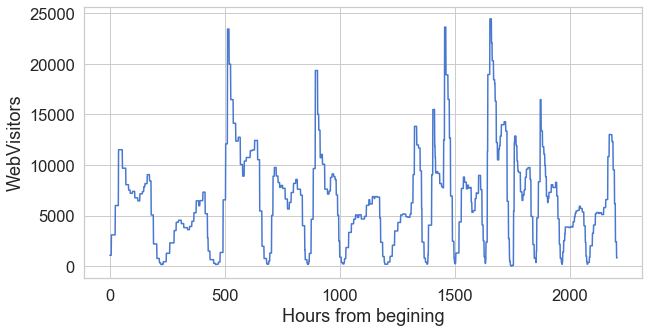

In [88]:
# see all data
plt.figure(figsize=(10,5))

plt.plot(df.index,df['WebVisitors'])
plt.ylabel('WebVisitors')
plt.xlabel('Hours from begining')
plt.show()

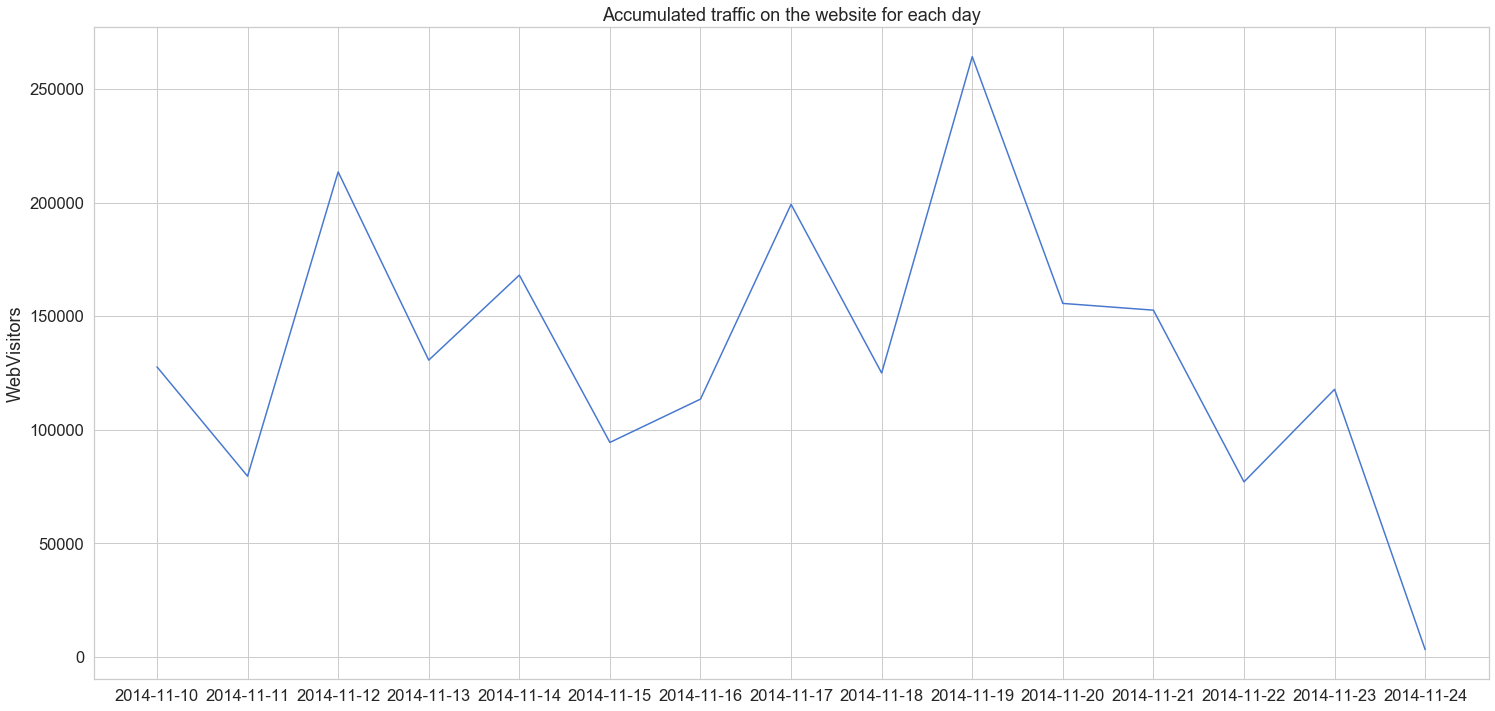

In [92]:
df2 = get_sum_features_by_hour(df)
df2 = get_sum_by_day(df2)
plt.figure(figsize=(25,12))
plt.plot(df2.Date,df2['WebVisitors_day_sum'])
plt.ylabel('WebVisitors')
plt.title('Accumulated traffic on the website for each day')

plt.show()


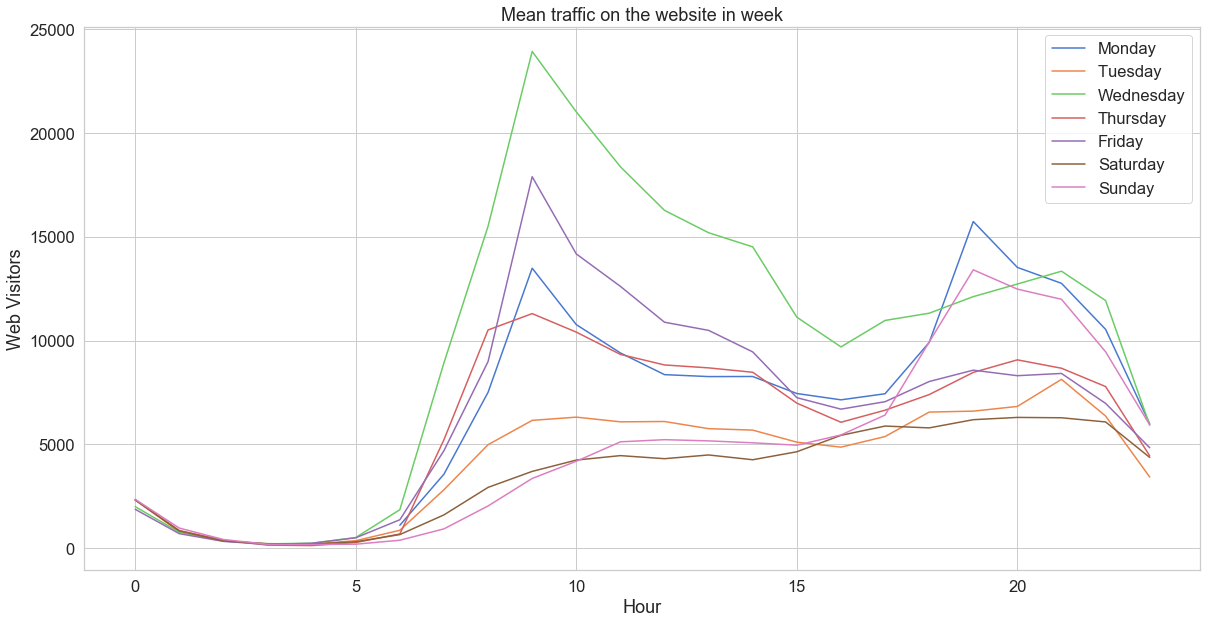

In [93]:
df2 = get_week_days(df2)
df2 = get_mean_by_hour_and_day(df2)
plt.figure(figsize=(20,10))
data=df2.Date.unique()
label = ['Monday','Tuesday ','Wednesday','Thursday','Friday','Saturday','Sunday']
dni = list(range(7))
for i in range(len(dni)):
    df_temp1 = df2[(df2.Date==data[i])]  
    plt.plot(df_temp1['Time'],df_temp1['WebVisitors_mean'],label=label[i])
    
plt.title('Mean traffic on the website in week')
plt.ylabel('Web Visitors')
plt.xlabel('Hour')
plt.legend()
plt.show()

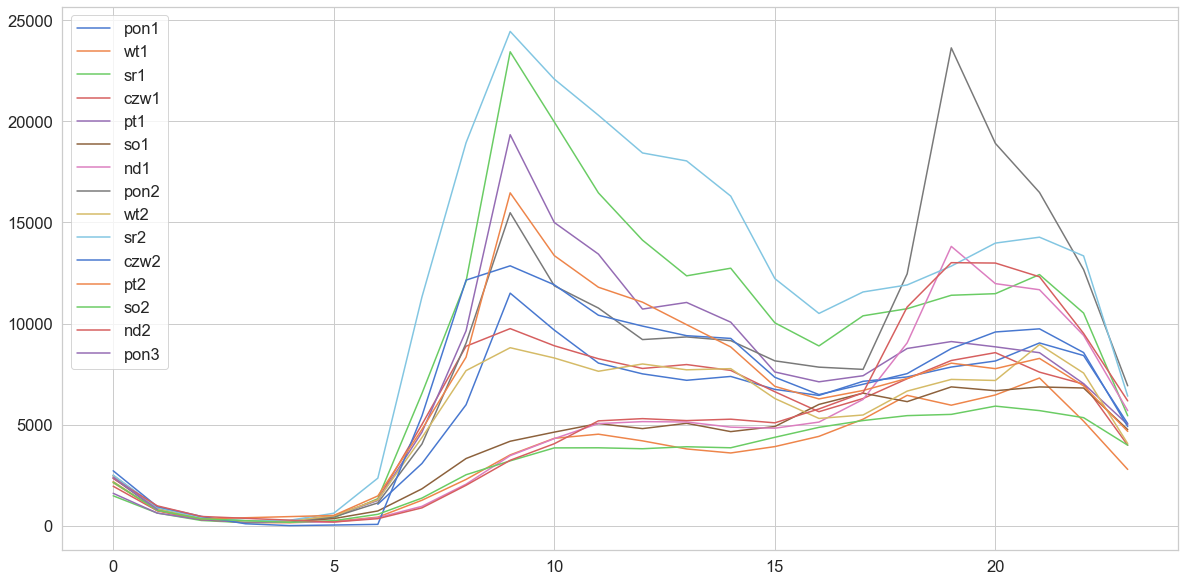

In [123]:
# getting data to train
df = get_dummies(df_x,df_y)
df = get_sum_features_by_hour(df)
df = get_week_days(df)
df = get_days_off(df)

#df = get_mean_by_hour(df)
#df['WebVisitors'] = (df['WebVisitors']/(df['WebVisitors'].max()/2)) - 1
# wykresy
df.insert(len(df.columns), "Next_Day",'') 
ndays = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
data=df.Date.unique()

for i in range(len(data)):
    df.loc[(df.Date == data[i]), 'Next_Day'] = ndays[i]
   

label = ['pon1','wt1','sr1','czw1','pt1','so1','nd1','pon2','wt2','sr2','czw2','pt2','so2','nd2','pon3']
plt.figure(figsize=(20,10))

for i in range(len(ndays)):
    df_temp1 = df[(df.Next_Day==ndays[i])]
    plt.plot(df_temp1['Time'],df_temp1['WebVisitors'],label=label[i])
    
plt.legend()
plt.show()
df = df.drop(columns=['Next_Day'])   
df = df.drop(columns=['Date'])   
df = df.drop(columns=['Timeband_Day'])   
df = df.drop(columns=['Timeband_Night'])   
df = df.drop(columns=['Timeband_Prime'])   



In [124]:
# scale data
#df = scale_columns(df)
df['WebVisitors'] = (df['WebVisitors']/(df['WebVisitors'].max()/2)) #- 1
df

,Time,GRP,Title_Dokument,Title_Film,Title_Informacje,Title_Inne,Title_Kulinarne,Title_Magazyny publicystyczne,Title_Motoryzacja,Title_Muzyka,Title_Nauka,Title_Pogoda,Title_Przyroda,Title_Rozrywka,Title_Sport,Title_Styl,Title_TV_sniadaniowa,Campaign Channel_Polsat,Campaign Channel_Polsat Pakiet Tematyczny,Campaign Channel_TVN,Campaign Channel_TVN Pakiet Tematyczny,Campaign Channel_TVP Pakiet Tematyczny,Campaign Channel_TVP1,Campaign Channel_TVP2,BreakType (Block type)_After,BreakType (Block type)_Before,BreakType (Block type)_Between,Position Type in the block of commercials_First / Last,Position Type in the block of commercials_Middle,Position Type in the block of commercials_Second / Penultimate,WebVisitors,Week_Day,day_off
0,6,0.00,1,2,0,0,0,0,1,1,0,0,0,2,0,0,0,0,1,0,5,1,0,0,1,0,6,0,5,2,0.0875399,1,0
1,7,0.00,4,6,0,0,1,1,2,0,0,0,1,0,1,1,0,0,9,0,4,4,0,0,7,1,9,3,11,3,0.252475,1,0
2,8,0.34,5,2,1,0,0,1,0,0,0,0,0,0,1,3,1,0,5,0,6,2,0,1,2,3,9,4,8,2,0.489978,1,0
3,9,4.87,5,7,1,0,0,0,0,1,0,0,0,0,0,1,2,0,6,1,5,3,1,1,5,1,11,2,14,1,0.94134,1,0
4,10,0.59,6,3,0,0,2,1,0,3,0,0,0,0,0,0,0,0,6,0,6,3,0,0,1,3,11,5,8,2,0.79195,1,0
5,11,0.85,7,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,5,0,4,3,0,0,2,2,8,1,10,1,0.658513,1,0
6,12,0.33,2,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,5,0,1,0,1,0,1,1,5,1,5,1,0.614906,1,0
7,13,0.69,2,3,0,0,0,0,0,0,0,0,0,1,1,3,0,0,4,0,5,0,0,1,1,1,8,3,7,0,0.58889,1,0
8,14,0.36,4,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,6,1,0,0,3,1,6,2,7,1,0.604516,1,0
9,15,1.81,4,3,0,0,0,0,0,3,0,0,0,3,0,0,0,0,4,0,8,0,0,1,2,0,11,1,10,2,0.552074,1,0


In [127]:

train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

294 33


In [128]:
time_steps = 10

X_train, y_train = create_dataset(train.drop(columns=['WebVisitors']), train.WebVisitors, time_steps)
X_test, y_test = create_dataset(test.drop(columns=['WebVisitors']), test.WebVisitors, time_steps)
X_train = X_train.astype(float)
y_train = y_train.astype(float) 
X_test = X_test.astype(float)
y_test = y_test.astype(float) 
print(X_train.shape, y_train.shape)

(284, 10, 32) (284,)


In [129]:
model = keras.Sequential()
model.add(keras.layers.Bidirectional(keras.layers.LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Dense(64))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [132]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
8/8 [==============================] - 0s 7ms/step - loss: 0.0658 - val_loss: 0.0500
Epoch 2/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0631 - val_loss: 0.0538
Epoch 3/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0716 - val_loss: 0.0603
Epoch 4/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0911 - val_loss: 0.0397
Epoch 5/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0510 - val_loss: 0.0503
Epoch 6/30
8/8 [==============================] - 0s 6ms/step - loss: 0.0645 - val_loss: 0.0425
Epoch 7/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0478 - val_loss: 0.0437
Epoch 8/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0429 - val_loss: 0.0394
Epoch 9/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0424 - val_loss: 0.0404
Epoch 10/30
8/8 [==============================] - 0s 5ms/step - loss: 0.0374 - val_loss: 0.0414
Epoch 11/30
8/8 [======================

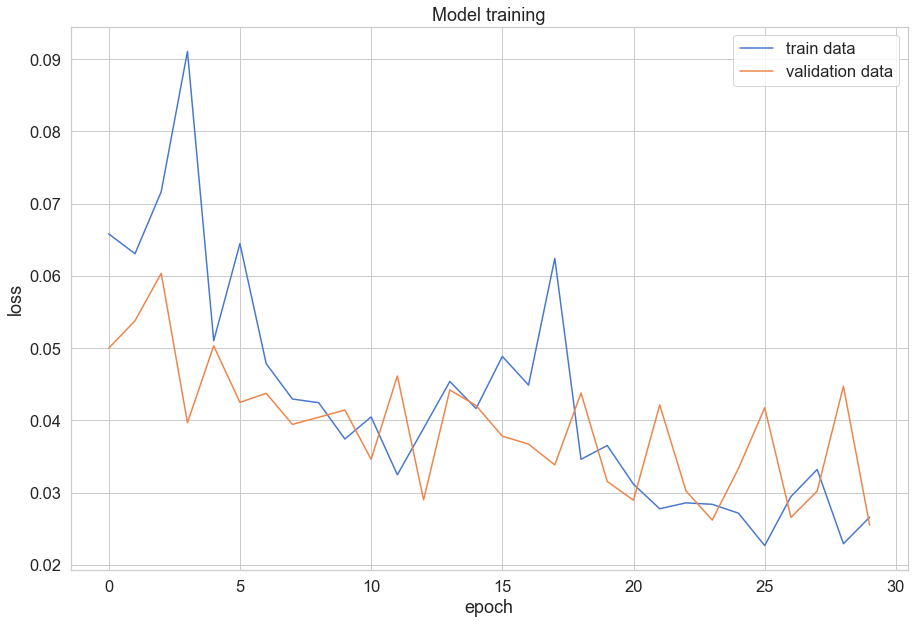

In [133]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'], label='train data')
plt.plot(history.history['val_loss'], label='validation data')
plt.ylabel('loss')
plt.title('Model training')
plt.xlabel('epoch')
plt.legend()

In [134]:
X_test
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

TypeError: 'str' object is not callable

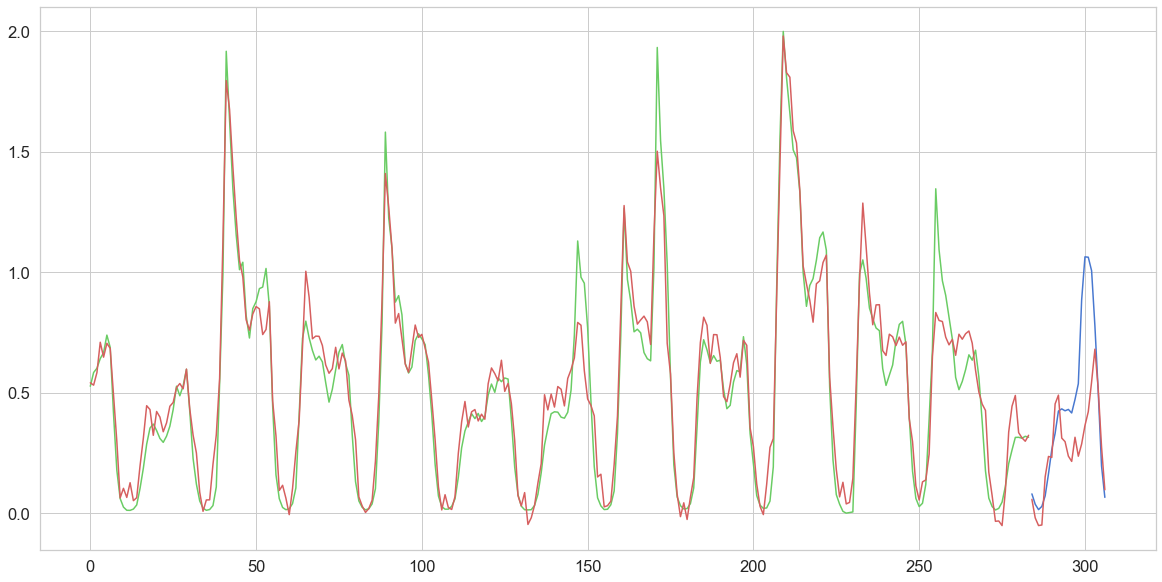

In [155]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
plt.figure(figsize=(20,10))
plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', label="train data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.flatten(),  label="test data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred.flatten(), 'r', label="prediction")
plt.plot(np.arange(0, len(y_train)), y_pred_train.flatten(), 'r', label="prediction (trained)")
plt.title('Model fit')
plt.ylabel('Output')
plt.xlabel('Time')
plt.legend()
plt.show();

In [318]:
df_test

,Time,GRP,Title_Dokument,Title_Film,Title_Informacje,Title_Inne,Title_Kulinarne,Title_Magazyny publicystyczne,Title_Motoryzacja,Title_Muzyka,Title_Nauka,Title_Pogoda,Title_Przyroda,Title_Rozrywka,Title_Sport,Title_Styl,Title_TV_sniadaniowa,Campaign Channel_Polsat,Campaign Channel_Polsat Pakiet Tematyczny,Campaign Channel_TVN,Campaign Channel_TVN Pakiet Tematyczny,Campaign Channel_TVP Pakiet Tematyczny,Campaign Channel_TVP1,Campaign Channel_TVP2,BreakType (Block type)_After,BreakType (Block type)_Before,BreakType (Block type)_Between,Position Type in the block of commercials_First / Last,Position Type in the block of commercials_Middle,Position Type in the block of commercials_Second / Penultimate,Week_Day
0,6,0.00,1,2,0,0,0,0,1,1,0,0,0,2,0,0,0,0,1,0,5,1,0,0,1,0,6,0,5,2,6
1,7,0.00,4,6,0,0,1,1,2,0,0,0,1,0,1,1,0,0,9,0,4,4,0,0,7,1,9,3,11,3,6
2,8,0.34,5,2,1,0,0,1,0,0,0,0,0,0,1,3,1,0,5,0,6,2,0,1,2,3,9,4,8,2,6
3,9,4.87,5,7,1,0,0,0,0,1,0,0,0,0,0,1,2,0,6,1,5,3,1,1,5,1,11,2,14,1,6
4,10,0.59,6,3,0,0,2,1,0,3,0,0,0,0,0,0,0,0,6,0,6,3,0,0,1,3,11,5,8,2,6
5,11,0.85,7,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,5,0,4,3,0,0,2,2,8,1,10,1,6
6,12,0.33,2,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,5,0,1,0,1,0,1,1,5,1,5,1,6
7,13,0.69,2,3,0,0,0,0,0,0,0,0,0,1,1,3,0,0,4,0,5,0,0,1,1,1,8,3,7,0,6
8,14,0.36,4,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,6,1,0,0,3,1,6,2,7,1,6
9,15,1.81,4,3,0,0,0,0,0,3,0,0,0,3,0,0,0,0,4,0,8,0,0,1,2,0,11,1,10,2,6


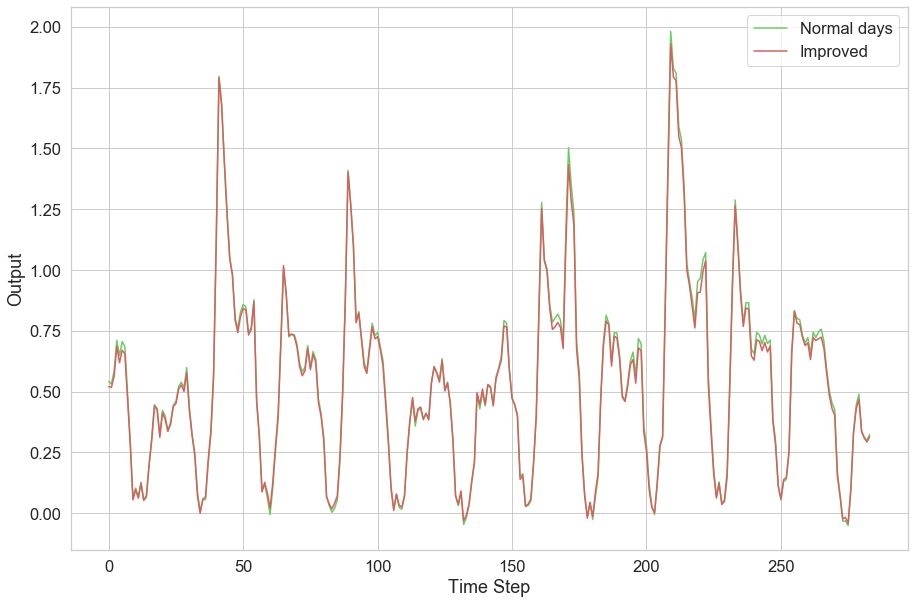

In [169]:
df_test = df.iloc[0:train_size]
df_test = df_test.drop(columns=['WebVisitors'])
column = 'Title_Film'
df_test[column] = (df_test[column]+1) 
X_test_mod, y_test_mod = create_dataset(df_test, train.WebVisitors, time_steps)
X_test_mod = X_test_mod.astype(float)
y_pred_mod = model.predict(X_test_mod)
y_pred_norm = model.predict(X_train)
plt.figure(figsize=(15,10))
plt.plot(np.arange(0, len(y_train)), y_pred_norm.flatten(), 'g', label="Normal days")
plt.plot(np.arange(0, len(y_train)), y_pred_mod.flatten(), 'r' , label="Improved")
plt.ylabel('Output')
plt.xlabel('Time Step')

plt.legend()
plt.show();

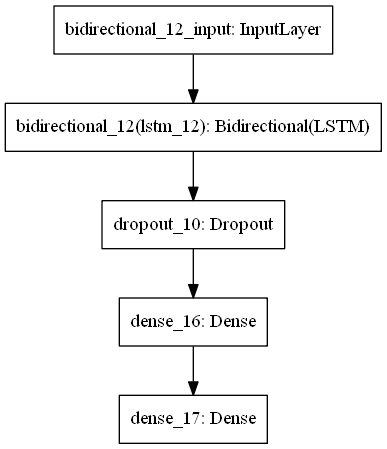

In [136]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)